In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
#Use clothing retain sale data from FRED (Federal Resale Economic Database)
#Suggested Citation: U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; 
#https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.
#Units: Millions of Dollars

#Use clothing retain sale data from FRED (Federal Resale Economic Database)
df=pd.read_csv("RSCCASN.csv",parse_dates=True,index_col="DATE")#To reade date as datetime object and  use that column as index

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [110]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [111]:
df.columns=["Sales"]

<AxesSubplot:xlabel='DATE'>

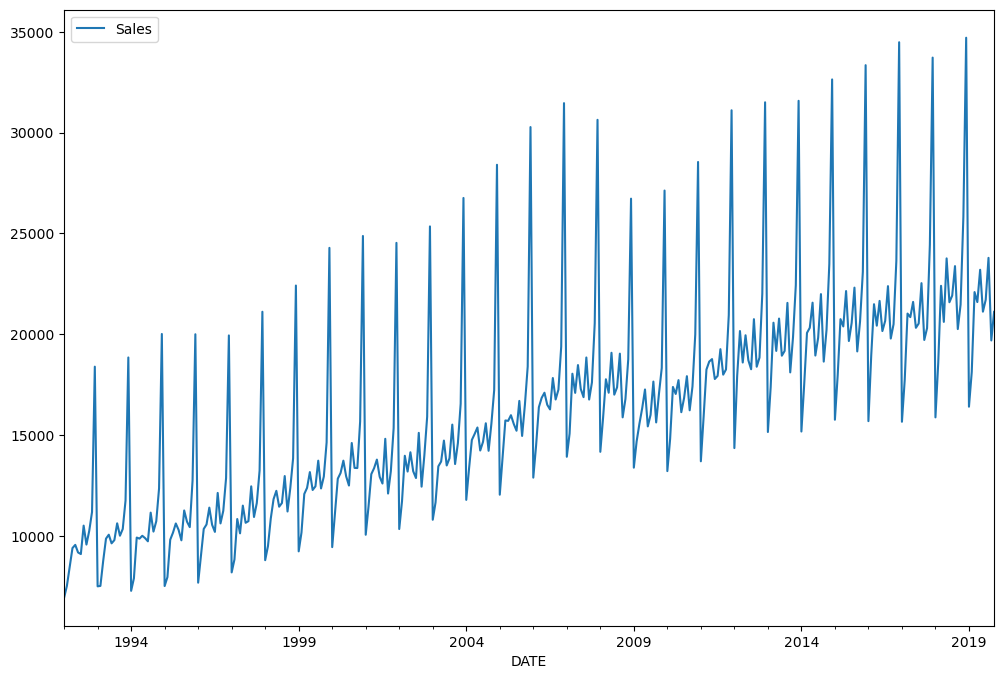

In [112]:
df.plot(figsize=(12,8))

In [113]:
#The plot shows that our timeseries is not stationary,
#the mean, variance and autocorrelation are not constant over time and it has seasonality with period of 1 year.
#Autocorrelation of the series, the correlation a time series has with one of its lags

In [114]:
len(df)

334

## Creating the model

In [115]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [116]:
#We can see that the trend in our timeseries can be approximated by a line
#As our timeseries is time dependent we we can create time-step feature to model time dependence
#Let's add time-step feature
df['Time'] = np.arange(len(df.index))
df.head()

,Sales,Time
DATE,,
1992-01-01,6938,0
1992-02-01,7524,1
1992-03-01,8475,2
1992-04-01,9401,3
1992-05-01,9558,4


In [117]:
#Now lets look at lag features and see if our time series has serial dependence, when an observation can be predicted from previous observations

In [118]:
#To make a lag feature we shift the sales values by 1
df['Lag_1'] = df['Sales'].shift(1)
df = df.reindex(columns=['Sales', 'Lag_1'])

df.head()

,Sales,Lag_1
DATE,,
1992-01-01,6938,NaN
1992-02-01,7524,6938.0
1992-03-01,8475,7524.0
1992-04-01,9401,8475.0
1992-05-01,9558,9401.0


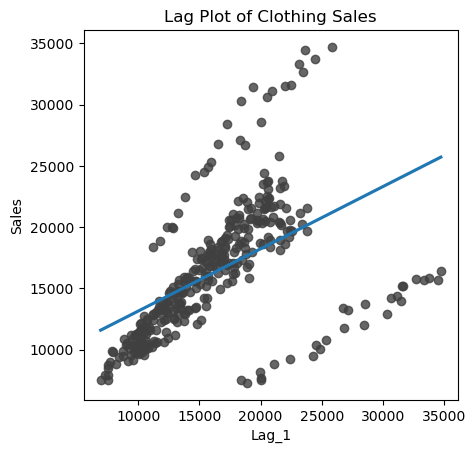

In [119]:
#Now lets fit a straight line to lag plot of Sales vs Lag_1
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Sales', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Clothing Sales');
plt.savefig("Plots/Lag_plot.png",bbox_inches="tight")

In [120]:
#We can see that the sales from one day are correlated with sales from previous day.
#This means lag features can be useful in modeling of sales

In [121]:
#Lets now model data using Linear Regression and both time step and lag fetaures

In [122]:
df['Time'] = np.arange(len(df.index))

In [123]:
df

,Sales,Lag_1,Time
DATE,,,
1992-01-01,6938,NaN,0
1992-02-01,7524,6938.0,1
1992-03-01,8475,7524.0,2
1992-04-01,9401,8475.0,3
1992-05-01,9558,9401.0,4
...,...,...,...
2019-06-01,21123,23200.0,329
2019-07-01,21714,21123.0,330
2019-08-01,23791,21714.0,331


In [124]:
#We'll drop the missing values that come from creating lag values
df.dropna(inplace=True)  # drop missing values in the feature set

## Adding month dummies for describing seasonality

In [125]:
#It is clear that our timesearies has a seasonality wit one year period
#This means it will be useful to add the months of the year as features
# Step 1: Extract month from datetime index
df['month'] = df.index.month

In [126]:
df

,Sales,Lag_1,Time,month
DATE,,,,
1992-02-01,7524,6938.0,1,2
1992-03-01,8475,7524.0,2,3
1992-04-01,9401,8475.0,3,4
1992-05-01,9558,9401.0,4,5
1992-06-01,9182,9558.0,5,6
...,...,...,...,...
2019-06-01,21123,23200.0,329,6
2019-07-01,21714,21123.0,330,7
2019-08-01,23791,21714.0,331,8


In [127]:
# Step 2: One-hot encode the month feature
month_dummies = pd.get_dummies(df['month'], prefix='month',drop_first=True)

In [128]:
# Step 3: Concatenate with original DataFrame
df = pd.concat([df, month_dummies], axis=1)

In [129]:
# (Optional) Drop the numeric month column
df.drop(columns='month', inplace=True)

In [130]:
df

,Sales,Lag_1,Time,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,
1992-02-01,7524,6938.0,1,1,0,0,0,0,0,0,0,0,0,0
1992-03-01,8475,7524.0,2,0,1,0,0,0,0,0,0,0,0,0
1992-04-01,9401,8475.0,3,0,0,1,0,0,0,0,0,0,0,0
1992-05-01,9558,9401.0,4,0,0,0,1,0,0,0,0,0,0,0
1992-06-01,9182,9558.0,5,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,21123,23200.0,329,0,0,0,0,1,0,0,0,0,0,0
2019-07-01,21714,21123.0,330,0,0,0,0,0,1,0,0,0,0,0
2019-08-01,23791,21714.0,331,0,0,0,0,0,0,1,0,0,0,0


In [131]:
df.columns[1:]

Index(['Lag_1', 'Time', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [132]:
df

,Sales,Lag_1,Time,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,
1992-02-01,7524,6938.0,1,1,0,0,0,0,0,0,0,0,0,0
1992-03-01,8475,7524.0,2,0,1,0,0,0,0,0,0,0,0,0
1992-04-01,9401,8475.0,3,0,0,1,0,0,0,0,0,0,0,0
1992-05-01,9558,9401.0,4,0,0,0,1,0,0,0,0,0,0,0
1992-06-01,9182,9558.0,5,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,21123,23200.0,329,0,0,0,0,1,0,0,0,0,0,0
2019-07-01,21714,21123.0,330,0,0,0,0,0,1,0,0,0,0,0
2019-08-01,23791,21714.0,331,0,0,0,0,0,0,1,0,0,0,0


In [133]:
#train_size = int(len(df) * 0.7)
train_size = 283
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [134]:
feature_names=df.columns[1:]

In [135]:
from sklearn.linear_model import LinearRegression

X_train = train.loc[:, feature_names]
y_train = train.loc[:, 'Sales']  # create the target
#y_train, X_train = y.align(X_train, join='inner')  # drop corresponding values in target



model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
X_test = test.loc[:, feature_names]
y_test= test.loc[:, 'Sales']  # create the target
y_test, X_test = y_test.align(X_test, join='inner')

y_pred = pd.Series(model.predict(X_test), index=X_test.index)

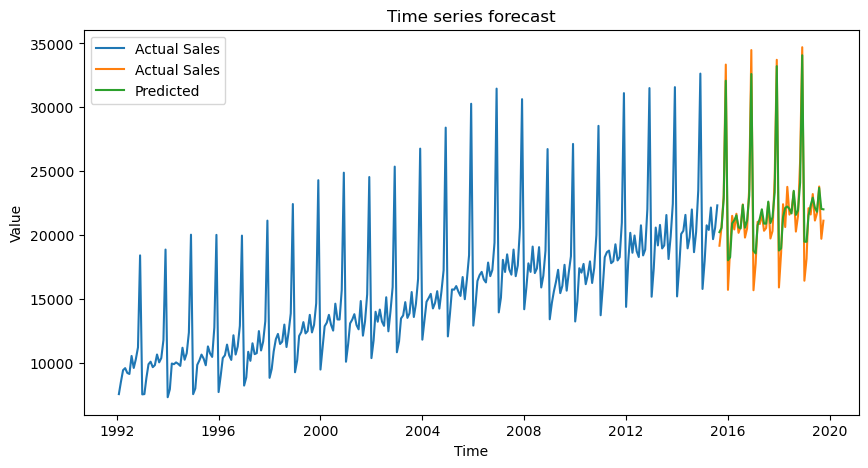

In [154]:
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Actual Sales')
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted')
plt.title("Time series forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
#plt.show()
plt.savefig("Plots/Test_LinReg.png",bbox_inches="tight")

In [138]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error 

In [139]:
r2_score(y_test, y_pred) 

0.9212568291199382

In [140]:
mse = mean_squared_error(y_test, y_pred)

In [141]:
np.sqrt(mse)

1172.6104963282742

In [142]:
y_test.mean()

21876.28

In [143]:
np.sqrt(mse)/y_test.mean()*100

5.360191478296467

## Forecasting future steps 

In [144]:
type(y_test)

pandas.core.series.Series

In [145]:
# Start from last known data
last_known = df.iloc[-1:].copy()
forecast_steps = 12
future_preds = []

for step in range(forecast_steps):
    # Create next time step
    new_row = {}

    # Lag features (use last prediction or known value)
    new_row['Lag_1'] = last_known['Sales'].values[0]
    
    # Increment time step
    new_row['Time'] = last_known['Time'].values[0] + 1

    # Month features
    next_date = last_known.index[0] + pd.DateOffset(months=1)
    month = next_date.month
    for m in range(2, 13):  # month_2 to month_12 (drop_first=True)
        new_row[f'month_{m}'] = 1 if month == m else 0

    # Create DataFrame for prediction
    X_next = pd.DataFrame([new_row])

    # Predict
    y_next = model.predict(X_next)[0]
    future_preds.append((next_date, y_next))

    # Update last_known for next loop
    new_full = X_next.copy()
    new_full['Sales'] = y_next
    new_full['Lag_1'] = new_row['Lag_1']
    new_full.index = [next_date]
    last_known = new_full

In [146]:
future_preds

[(Timestamp('2019-11-01 00:00:00'), 24270.717515871947),
 (Timestamp('2019-12-01 00:00:00'), 33779.70480741856),
 (Timestamp('2020-01-01 00:00:00'), 19420.475406662692),
 (Timestamp('2020-02-01 00:00:00'), 20938.73006884881),
 (Timestamp('2020-03-01 00:00:00'), 22921.42069231796),
 (Timestamp('2020-04-01 00:00:00'), 22938.042887006843),
 (Timestamp('2020-05-01 00:00:00'), 23747.882799819963),
 (Timestamp('2020-06-01 00:00:00'), 22648.694169263872),
 (Timestamp('2020-07-01 00:00:00'), 22713.74811349439),
 (Timestamp('2020-08-01 00:00:00'), 24384.31679943249),
 (Timestamp('2020-09-01 00:00:00'), 22575.160774018055),
 (Timestamp('2020-10-01 00:00:00'), 23431.933260948157)]

In [147]:
# Make future series
future_df = pd.Series(dict(future_preds))

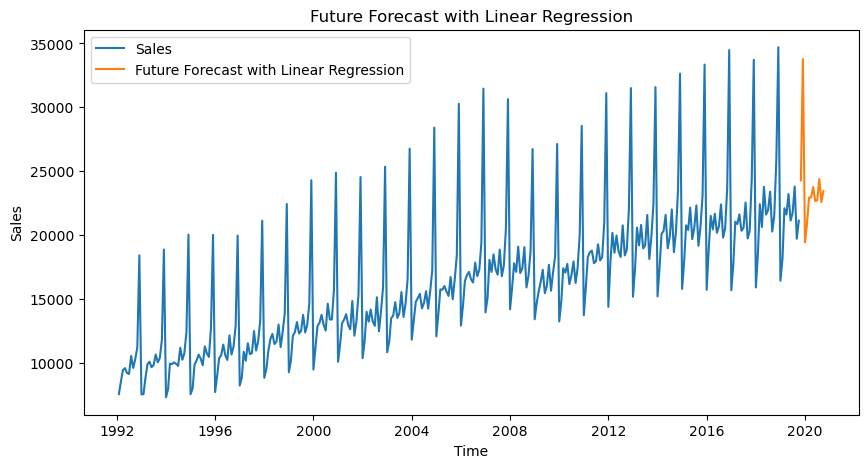

In [152]:
plt.figure(figsize=(10, 5))
plt.plot(df['Sales'], label='Sales')
plt.plot(future_df, label='Future Forecast with Linear Regression')
plt.title("Future Forecast with Linear Regression")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
#plt.show()
plt.savefig("Plots/Futureforecast_LinReg.png",bbox_inches="tight")

## Save model to a file

In [149]:
import joblib

In [150]:
# Save model to file
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']